# Make figures for multiple model runs

This is a notebook to generate a figure with side by side panels of surface elevation and watertable for several model runs, and a second figure with panels for the different water and erosion fluxes in these model runs.

See the notebook [summary_figures.ipynb](summary_figures.ipynb) for making summary figures of drainage density and incision for multiple model runs.

In [8]:
import pickle
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

import lib.figure_lib as flib

pl.rcParams['mathtext.default'] = 'regular'

## Parameters

In [9]:
# filename of pickle file
#fn = 'model_results/model_results_3_runs_100000yrs_Ts_id_90_25-3-2021.pck'
#fn = 'model_results/model_results_3_runs_100000yrs_Ts_id_882_25-3-2021.pck'

fn = 'model_results/model_results_34_runs_100000yrs_sensitivity_all_id_311_1-4-2021.pck'

#fnd = 'model_results/model_results_34_runs_100000yrs_sensitivity_all_id_311_1-4-2021.csv'

## Model runs to display

In [10]:
display_param = 'T'
display_param_values = [1e-4, 1e-3, 1e-2]

## Load model results

In [11]:
fin = open(fn, 'rb')
output_data = pickle.load(fin)
fin.close()

## Get parameters model results

In [12]:
(df, times_all, x, zs_all, hs_all, 
 n_str_all, Q_baseflows_all, Q_overland_flows_all, 
 erosion_of_per_yr_all, erosion_bf_per_yr_all,
 erosion_hd_per_yr_all) = output_data

## Figure out which parameters changed in all runs

In [13]:
cols = df.columns.tolist()
cols = [c for c in cols if 'Unnamed' not in c]

input_cols = cols[:cols.index('n_streams')]

nus = np.array([len(df[col].unique()) for col in input_cols])

changed_param_ind = np.where(nus > 1)[0]
changed_params = [input_cols[ci] for ci in changed_param_ind] 

#changed_params.append(changed_param)
   
print('changed parameters in model sensitivity runs:')
print(changed_params)

changed parameters in model sensitivity runs:
['K_d', 'P', 'S_init', 'T', 'n', 'specific_yield']


##

## Select model runs to show

In [19]:
#n_exps = len(times_all)

#plot_inds = np.round(np.linspace(0, n_exps-1, 3)).astype(int)

#print('showing model experiment numbers ', plot_inds)

plot_inds = []

for v in display_param_values:
    ind = df[display_param] == v
    plot_inds.append(df.loc[ind].index[0])

changed_params = [display_param]

In [20]:
plot_inds

[18, 0, 22]

## Make a figure of surface elevation and watertable of three model experiments

saving model exps as model_results/model_results_34_runs_100000yrs_sensitivity_all_id_311_1-4-2021modelled_h_and_z_3_model_exps_T.pdf


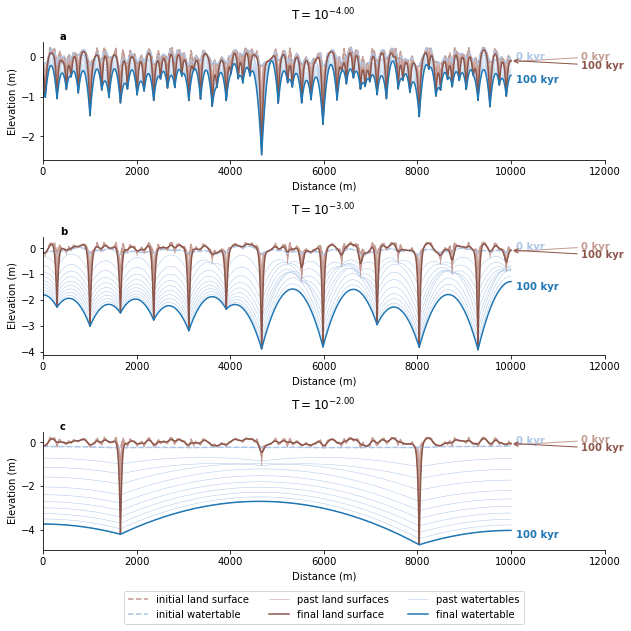

In [24]:
import importlib
importlib.reload(flib)

#changed_param = scenario_param_names[0][:-2]
    
#param_vals = df[changed_param].values
    

fig, axs = pl.subplots(3, 1, figsize=(9, 9))

for ax, pi in zip(axs, plot_inds):
    
    if ax == axs[-1]:
        add_legend = True
    else:
        add_legend = False
        
    flib.make_h_and_z_plot(ax, times_all[pi], x, zs_all[pi], hs_all[pi], add_legend=add_legend)

    fig.tight_layout()

for i, ax in enumerate(axs):
    tekst = ''
    for changed_param in changed_params:
        tekst +=  r'$%s = 10^{%0.2f}$' % (changed_param, np.log10(df.iloc[plot_inds[i]][changed_param]))
        tekst += '\n'
    ax.set_title(tekst, ha='center')
    
for i, panel in enumerate(axs):
    #panel.spines['top'].set_visible(False)
    #panel.spines['right'].set_visible(False)
    panel.text(0.03, 1.0, string.ascii_lowercase[i], 
            weight='bold', transform=panel.transAxes, ha='left', va='bottom')

fig.tight_layout()

fnout = fn[:-4] + f'modelled_h_and_z_{len(plot_inds)}_model_exps_{"".join(changed_params)}.pdf' 
print(f'saving model exps as {fnout}')
fig.savefig(fnout)



saving model exps as model_results/model_results_34_runs_100000yrs_sensitivity_all_id_311_1-4-2021variables_vs_time_3_model_exps_T.pdf


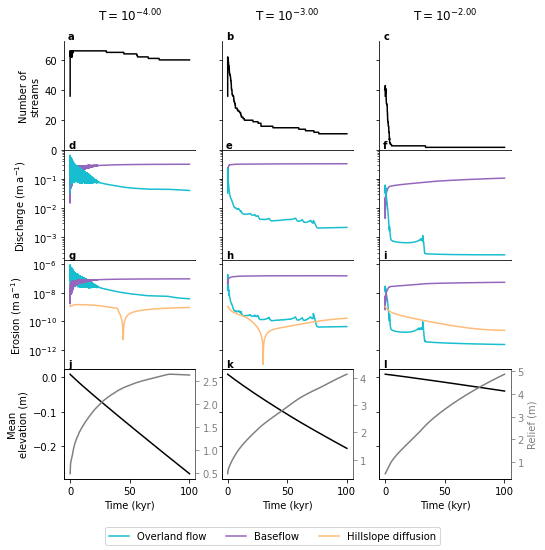

In [25]:
################################################
## Figure with n streams, fluxes and erosion over time
################################################
ncols = 3
fig, axs = pl.subplots(4, ncols, sharex=True, sharey='row', figsize=(8, 8))

for i, pi in enumerate(plot_inds):
    
    axsi = axs[:, i]
    
    if i == 0:
        add_labels_left = True
        add_labels_right = False
        add_legend = False
    elif i == ncols -1:
        add_legend = True
        add_labels_left = False
        add_labels_right = True
    else:
        add_legend = False
        add_labels_left = False
        add_labels_right = False
    
    width = x.max() - x.min()
    
    flib.vars_over_time_fig(axsi, times_all[pi], width, n_str_all[pi], 
                            Q_baseflows_all[pi], Q_overland_flows_all[pi], 
                            erosion_of_per_yr_all[pi], erosion_bf_per_yr_all[pi],
                            erosion_hd_per_yr_all[pi], zs_all[pi], 
                            add_legend=add_legend, add_labels_left=add_labels_left, 
                            add_labels_right=add_labels_right)

    
#fig.tight_layout()

for i, ax in enumerate(axs[0, :]):
    tekst = ''
    for changed_param in changed_params:
        tekst +=  r'$%s = 10^{%0.2f}$' % (changed_param, np.log10(df.iloc[plot_inds[i]][changed_param]))
        tekst += '\n'
    ax.set_title(tekst, ha='center')
    
    
fig.subplots_adjust(hspace=0.0)

for i, panel in enumerate(axs.ravel()):
    #panel.spines['top'].set_visible(False)
    #panel.spines['right'].set_visible(False)
    panel.text(0.03, 1.0, string.ascii_lowercase[i], 
            weight='bold', transform=panel.transAxes, ha='left', va='bottom')

#fn = 'model_results/overview_variables_vs_time_log_%s.pdf' % output_file_adj

#print('saving figure as %s' % fn)

#fnout = fn[:-4] + 'variables_vs_time.pdf' 
#print(f'saving model exps as {fnout}')
#fig.savefig(fnout)

fnout = fn[:-4] + f'variables_vs_time_{len(plot_inds)}_model_exps_{"".join(changed_params)}.pdf' 
print(f'saving model exps as {fnout}')
fig.savefig(fnout)